_Student: Elena Kiseleva_

———————————————————————

## Домашнее задание (лекция 10)

Во вкладке Files в группе Webinars прикреплен файл _olimpicmedals.csv с данными о медалях на Олимпийских играх за 1896-2008 годы.

Ссылка:
https://epam.sharepoint.com/sites/EPAMNNPythonLab/Shared%20Documents/Webinars/olimpic_medals.csv

Скачайте .csv файл себе на диск, загрузите данные в DataFrame (функция read_csv) и ответьте на следующие вопросы, используя функционал pandas:

1. Сколько медалей выиграл Jesse Owens в 1936?
2. Какая страна выиграла большинство золотых медалей мужчинами в бадминтоне?
3. Какие три страны выиграли большинство медалей в последние годы (с 1984 по 2008)?
4. Покажите мужчин золотых медалистов по 100m. Выведите результаты по убыванию года выигрыша. Покажите город, в котором проходила олимпиада, год, имя атлета и страну за которую он выступал.
5. Как много медалей было выиграно мужчинами и женщинами в истории олимпиады? Как много золотых, серебрянных и бронзовых медалей было выиграно каждым полом?
6. Используя groupby(), постройте график числа всех медалей, выигранных на каждой олимпиаде.
7. Создайте список, показывающий число всех медалей, выигранных каждой страной в течение всей истории олимпийских игр. Для каждой страны, необходимо показать год первой и последней заработанной медали.
8. Атлеты, выигравшие медали в Beijing на дистанции 100m или 200m
9. Постройте график числа золотых медалей, выигранных США мужчинами и женщинами в атлетике.
10. Постройте график 5 атлетов, которые выиграли большинство золотых медалей.
11. Покажите суммарное количество медалей, выигранных странами в последних олимпийских играх.
12. Постройте таблицу, в которой по годам всех олимпиад покажите топовых атлетов США (1 атлет на год) по общему количеству медалей. Включите дисциплину атлета.

Форма чтобы засабмитить задание: https://epa.ms/pyhomework (https://epa.ms/pyhomework)

——————————————————————————————————————————————

In [1]:
# display all outputs, not only last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd
np.__version__
pd.__version__

'1.18.5'

'1.0.5'

_Базовый анализ_

In [3]:
df_big = pd.read_csv('olimpic_medals.csv')

In [4]:
df_big.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [5]:
df_big.shape

(29216, 10)

In [6]:
df_big.describe(percentiles=[], include='all')

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
count,29216,29216.000000,29216,29216,29216,29216,29216,29216,29216,29216
unique,22,NaN,42,56,21413,138,2,577,3,3
top,Athens,NaN,Aquatics,Athletics,"LATYNINA, Larisa",USA,Men,football,M,Gold
freq,2149,NaN,3828,3448,18,4335,21721,1387,20067,9850
mean,NaN,1967.713171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,32.406293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1896.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1976.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_big.Gender.unique()
df_big.Event_gender.unique() # This column doesn't need for answering our questions, we can or drop it, or convert to categorical type too

array(['Men', 'Women'], dtype=object)

array(['M', 'X', 'W'], dtype=object)

In [8]:
df_big.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29216 entries, 0 to 29215
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   City          29216 non-null  object
 1   Edition       29216 non-null  int64 
 2   Sport         29216 non-null  object
 3   Discipline    29216 non-null  object
 4   Athlete       29216 non-null  object
 5   NOC           29216 non-null  object
 6   Gender        29216 non-null  object
 7   Event         29216 non-null  object
 8   Event_gender  29216 non-null  object
 9   Medal         29216 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


In [9]:
df_big.memory_usage(deep=True)
df_big.memory_usage(deep=True).sum()

Index                64
City            1060916
Edition          233728
Sport           1089189
Discipline      1106010
Athlete         1344299
NOC              934912
Gender           949902
Event           1292190
Event_gender     993344
Medal           1002860
dtype: int64

10007414

_Немного оптимизации._

In [10]:
df = df_big.drop('Event_gender', axis=1)

In [11]:
df['Gender'] = df.Gender.astype('category')
df['City'] = df.City.astype('category')
df['Sport'] = df.Sport.astype('category')
df['Discipline'] = df.Discipline.astype('category')
df['NOC'] = df.NOC.astype('category')
df['Event'] = df.Event.astype('category')

In [12]:
from pandas.api.types import CategoricalDtype

medals_cat_type = CategoricalDtype(categories=['Bronze', 'Silver', 'Gold'], ordered=True)
df['Medal'] = df.Medal.astype(medals_cat_type)

In [13]:
years = df.Edition.unique()
years_cat_type = CategoricalDtype(categories=years, ordered=True)
df['Edition'] = df.Edition.astype(years_cat_type)

In [14]:
# одна строка дублируется
df[df.duplicated(keep=False)]

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Medal
16098,Moscow,1980,Hockey,Hockey,"SINGH, Singh",IND,Men,hockey,Gold
16099,Moscow,1980,Hockey,Hockey,"SINGH, Singh",IND,Men,hockey,Gold


In [15]:
df.drop_duplicates(keep='first', inplace=True)
df

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,Silver
...,...,...,...,...,...,...,...,...,...
29211,Beijing,2008,Wrestling,Wrestling Gre-R,"ENGLICH, Mirko",GER,Men,84 - 96kg,Silver
29212,Beijing,2008,Wrestling,Wrestling Gre-R,"MIZGAITIS, Mindaugas",LTU,Men,96 - 120kg,Bronze
29213,Beijing,2008,Wrestling,Wrestling Gre-R,"PATRIKEEV, Yuri",ARM,Men,96 - 120kg,Bronze
29214,Beijing,2008,Wrestling,Wrestling Gre-R,"LOPEZ, Mijain",CUB,Men,96 - 120kg,Gold


In [16]:
df.memory_usage(deep=True)
df.memory_usage(deep=True).sum()

Index          233720
City            30402
Edition         30447
Sport           31561
Discipline      32897
Athlete       1365854
NOC             65918
Gender          29329
Event           99105
Medal           29366
dtype: int64

1948599

In [17]:
df.dtypes

City          category
Edition       category
Sport         category
Discipline    category
Athlete         object
NOC           category
Gender        category
Event         category
Medal         category
dtype: object

### 1. Сколько медалей выиграл Jesse Owens в 1936?

In [18]:
JO_medals = df.loc[(df.Athlete == 'OWENS, Jesse') & (df.Edition == 1936), :]
JO_medals

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Medal
6427,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,100m,Gold
6439,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,200m,Gold
6456,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,4x100m relay,Gold
6523,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,long jump,Gold


In [19]:
medals = len(JO_medals)
end = 'ь' if medals % 10 == 1 else 'и' if medals % 10 in [2, 3, 4] else 'ей'
print(f'Owens Jesse в 1936 году выиграл {medals} медал{end}.')

Owens Jesse в 1936 году выиграл 4 медали.


### 2. Какая страна выиграла большинство золотых медалей мужчинами в бадминтоне?

In [20]:
gmb = df[(df.Sport == 'Badminton') & (df.Medal == 'Gold') & (df.Gender == 'Men')]
gmb

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Medal
20031,Barcelona,1992,Badminton,Badminton,"KIM, Moon-Soo",KOR,Men,doubles,Gold
20032,Barcelona,1992,Badminton,Badminton,"PARK, Joo-Bong",KOR,Men,doubles,Gold
20045,Barcelona,1992,Badminton,Badminton,"BUDI KUSUMA, Alan",INA,Men,singles,Gold
21771,Atlanta,1996,Badminton,Badminton,"MAINAKY, Rexy Ronald",INA,Men,doubles,Gold
21772,Atlanta,1996,Badminton,Badminton,"SUBAGJA, Ricky Achmad",INA,Men,doubles,Gold
21773,Atlanta,1996,Badminton,Badminton,"KIM, Dong Moon",KOR,Men,doubles,Gold
21787,Atlanta,1996,Badminton,Badminton,"HOYER-LARSEN, Poul Erik",DEN,Men,singles,Gold
23701,Sydney,2000,Badminton,Badminton,"GUNAWAN, Tony",INA,Men,doubles,Gold
23702,Sydney,2000,Badminton,Badminton,"WIJAYA, Candra",INA,Men,doubles,Gold
23703,Sydney,2000,Badminton,Badminton,"ZHANG, Jun",CHN,Men,doubles,Gold


In [21]:
gmb.NOC.value_counts().head()

INA    8
KOR    6
CHN    4
DEN    1
GDR    0
Name: NOC, dtype: int64

In [22]:
gmb.NOC.value_counts().index[0]

'INA'

### 3. Какие три страны выиграли большинство медалей в последние годы (с 1984 по 2008)?

In [23]:
df[(df.Edition >= 1984) & (df.Edition <= 2008)]

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Medal
16592,Los Angeles,1984,Aquatics,Diving,"LI, Kong-Zheng",CHN,Men,10m platform,Bronze
16593,Los Angeles,1984,Aquatics,Diving,"LOUGANIS, Gregory",USA,Men,10m platform,Gold
16594,Los Angeles,1984,Aquatics,Diving,"KIMBALL, Bruce D.",USA,Men,10m platform,Silver
16595,Los Angeles,1984,Aquatics,Diving,"WYLAND-WILLIAMS, Wendy Lian",USA,Women,10m platform,Bronze
16596,Los Angeles,1984,Aquatics,Diving,"ZHOU, Ji-Hong",CHN,Women,10m platform,Gold
...,...,...,...,...,...,...,...,...,...
29211,Beijing,2008,Wrestling,Wrestling Gre-R,"ENGLICH, Mirko",GER,Men,84 - 96kg,Silver
29212,Beijing,2008,Wrestling,Wrestling Gre-R,"MIZGAITIS, Mindaugas",LTU,Men,96 - 120kg,Bronze
29213,Beijing,2008,Wrestling,Wrestling Gre-R,"PATRIKEEV, Yuri",ARM,Men,96 - 120kg,Bronze
29214,Beijing,2008,Wrestling,Wrestling Gre-R,"LOPEZ, Mijain",CUB,Men,96 - 120kg,Gold


In [24]:
df[(df.Edition >= 1984) & (df.Edition <= 2008)].NOC.value_counts().head(3)

USA    1837
AUS     762
GER     691
Name: NOC, dtype: int64

### 4. Покажите мужчин золотых медалистов по 100m. Выведите результаты по убыванию года выигрыша. Покажите город, в котором проходила олимпиада, год, имя атлета и страну за которую он выступал.

_Здесь не очень было понятно, имееется ли в виду именно 100-метровка в беге, или все дисциплины, где есть какая-либо дистанция на 100 метров._

In [25]:
df[df.Event.str.contains('100m')].Event.unique().tolist()

['100m freestyle',
 '100m freestyle for sailors',
 '100m',
 '100m backstroke',
 '100m running deer, double shots',
 '100m running deer, single shots',
 '100m running deer, single shots, team',
 '4x100m freestyle relay',
 '4x100m relay',
 '100m running deer, double shots, team',
 '100m running deer, single/double shots',
 '100m butterfly',
 '4x100m medley relay',
 '100m breaststroke',
 '100m hurdles']

In [26]:
# Только легкая атлетика
MG_100m = df[(df.Gender == 'Men') & (df.Medal == 'Gold') & (df.Event == '100m')]
MG_100m.shape

(26, 9)

In [27]:
# Проверить выборку
MG_100m.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Medal
13,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,100m,Gold
231,Paris,1900,Athletics,Athletics,"JARVIS, Francis",USA,Men,100m,Gold
737,St Louis,1904,Athletics,Athletics,"HAHN, Archie",USA,Men,100m,Gold
1191,London,1908,Athletics,Athletics,"WALKER, Reginald",RSA,Men,100m,Gold
2022,Stockholm,1912,Athletics,Athletics,"CRAIG, Ralph",USA,Men,100m,Gold


In [28]:
MG_100m.sort_values('Edition', ascending=False).loc[:, ['City', 'Edition', 'Athlete', 'NOC']]

,City,Edition,Athlete,NOC
27552,Beijing,2008,"BOLT, Usain",JAM
25539,Athens,2004,"GATLIN, Justin",USA
23521,Sydney,2000,"GREENE, Maurice",USA
21598,Atlanta,1996,"BAILEY, Donovan",CAN
19859,Barcelona,1992,"CHRISTIE, Linford",GBR
18284,Seoul,1988,"LEWIS, Carl",USA
16794,Los Angeles,1984,"LEWIS, Carl",USA
15374,Moscow,1980,"WELLS, Allan",GBR
14069,Montreal,1976,"CRAWFORD, Hasely",TRI
12902,Munich,1972,"BORZOV, Valery",URS


In [29]:
# Учитывая дисциплины, где есть дистанция 100m
MG_100m_all = df[(df.Gender == 'Men') & (df.Medal == 'Gold') & (df.Event.str.contains('100m'))]
MG_100m_all.shape

(349, 9)

In [30]:
# Проверить выборку
MG_100m_all.iloc[40:45, :]

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Medal
3827,Antwerp,1920,Shooting,Shooting,"NATVIG, Harald",NOR,Men,"100m running deer, double shots, team",Gold
3828,Antwerp,1920,Shooting,Shooting,"NORDVIK, Hans",NOR,Men,"100m running deer, double shots, team",Gold
3835,Antwerp,1920,Shooting,Shooting,"OLSEN, Otto M.",NOR,Men,"100m running deer, single shots",Gold
3842,Antwerp,1920,Shooting,Shooting,"LIBERG, Einar",NOR,Men,"100m running deer, single shots, team",Gold
3843,Antwerp,1920,Shooting,Shooting,"LILLOE-OLSEN, Ole Andreas",NOR,Men,"100m running deer, single shots, team",Gold


In [31]:
pd.options.display.max_rows = 400
MG_100m_all.sort_values('Edition', ascending=False)[['City', 'Edition', 'Sport', 'Athlete', 'NOC', 'Event']]
pd.reset_option('display.max_rows')

,City,Edition,Sport,Athlete,NOC,Event
27606,Beijing,2008,Athletics,"POWELL, Asafa",JAM,4x100m relay
27321,Beijing,2008,Aquatics,"CROCKER, Ian",USA,4x100m medley relay
27212,Beijing,2008,Aquatics,"PEIRSOL, Aaron",USA,100m backstroke
27218,Beijing,2008,Aquatics,"KITAJIMA, Kosuke",JPN,100m breaststroke
27224,Beijing,2008,Aquatics,"PHELPS, Michael",USA,100m butterfly
27231,Beijing,2008,Aquatics,"BERNARD, Alain",FRA,100m freestyle
27287,Beijing,2008,Aquatics,"ADRIAN, Nathan",USA,4x100m freestyle relay
27288,Beijing,2008,Aquatics,"GREVERS, Matt",USA,4x100m freestyle relay
27289,Beijing,2008,Aquatics,"JONES, Cullen",USA,4x100m freestyle relay
27291,Beijing,2008,Aquatics,"PHELPS, Michael",USA,4x100m freestyle relay


### 5. Как много медалей было выиграно мужчинами и женщинами в истории олимпиады? Как много золотых, серебрянных и бронзовых медалей было выиграно каждым полом?

In [32]:
df.Gender.value_counts()

Men      21720
Women     7495
Name: Gender, dtype: int64

In [33]:
df.groupby(['Gender', 'Medal']).Medal.count()

Gender  Medal 
Men     Bronze    7175
        Silver    7181
        Gold      7364
Women   Bronze    2514
        Silver    2496
        Gold      2485
Name: Medal, dtype: int64

In [34]:
# Или так
pd.crosstab(df.Gender, df.Medal)

Medal,Bronze,Silver,Gold
Gender,,,
Men,7175,7181,7364
Women,2514,2496,2485


### 6. Используя groupby(), постройте график числа всех медалей, выигранных на каждой олимпиаде.

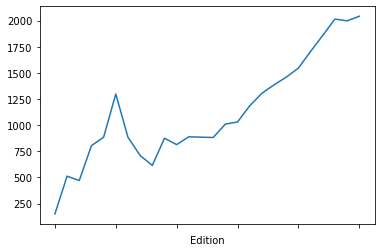

In [35]:
%matplotlib inline
df.groupby('Edition').Edition.count().plot()

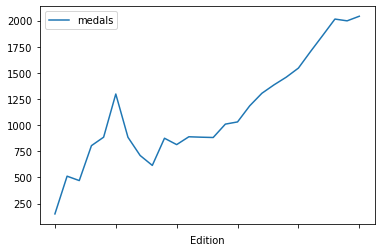

In [36]:
# Другой вариант
df.groupby('Edition').Edition.agg(['count']).rename(columns={'count':'medals'}).plot()

### 7. Создайте список, показывающий число всех медалей, выигранных каждой страной в течение всей истории олимпийских игр. Для каждой страны, необходимо показать год первой и последней заработанной медали.

In [37]:
country_medals = df.groupby('NOC').Edition.agg(['count', 'min', 'max'])
country_medals.index.name = 'country'
result = country_medals.rename(columns={'count':'total', 'min':'first', 'max':'last'})
result

,total,first,last
country,,,
AFG,1,2008,2008
AHO,1,1988,1988
ALG,14,1984,2008
ANZ,29,1908,1912
ARG,239,1924,2008
...,...,...,...
VIE,2,2000,2008
YUG,435,1924,2000
ZAM,2,1984,1996


In [38]:
# Полный список
pd.options.display.max_rows = 150
result
pd.reset_option('display.max_rows')

,total,first,last
country,,,
AFG,1,2008,2008
AHO,1,1988,1988
ALG,14,1984,2008
ANZ,29,1908,1912
ARG,239,1924,2008
ARM,9,1996,2008
AUS,1075,1896,2008
AUT,146,1896,2008
AZE,16,1996,2008


### 8. Атлеты, выигравшие медали в Beijing на дистанции 100m или 200m

In [39]:
df[(df.City == 'Beijing') & (df.Event.isin(['100m', '200m']))]

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Medal
27551,Beijing,2008,Athletics,Athletics,"DIX, Walter",USA,Men,100m,Bronze
27552,Beijing,2008,Athletics,Athletics,"BOLT, Usain",JAM,Men,100m,Gold
27553,Beijing,2008,Athletics,Athletics,"THOMPSON, Richard",TRI,Men,100m,Silver
27554,Beijing,2008,Athletics,Athletics,"FRASER, Shelly-ann",JAM,Women,100m,Gold
27555,Beijing,2008,Athletics,Athletics,"SIMPSON, Sherone",JAM,Women,100m,Silver
27556,Beijing,2008,Athletics,Athletics,"STEWART, Kerron",JAM,Women,100m,Silver
27569,Beijing,2008,Athletics,Athletics,"DIX, Walter",USA,Men,200m,Bronze
27570,Beijing,2008,Athletics,Athletics,"BOLT, Usain",JAM,Men,200m,Gold
27571,Beijing,2008,Athletics,Athletics,"CRAWFORD, Shawn",USA,Men,200m,Silver
27572,Beijing,2008,Athletics,Athletics,"STEWART, Kerron",JAM,Women,200m,Bronze


### 9. Постройте график числа золотых медалей, выигранных США мужчинами и женщинами в атлетике.

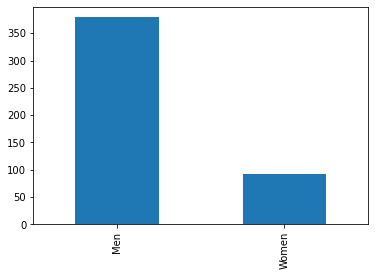

In [40]:
USA_gold_athlets = df[(df.NOC == 'USA') & (df.Medal == 'Gold') & (df.Sport == 'Athletics')]
USA_gold_athlets.Gender.value_counts().plot.bar()

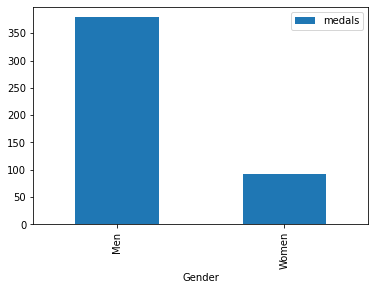

In [41]:
# С помощью groupby
USA_gold_athlets = df[(df.NOC == 'USA') & (df.Medal == 'Gold')  & (df.Sport == 'Athletics')]
USA_gold_athlets.groupby('Gender').Gender.agg(['count']).rename(columns={'count':'medals'}).plot.bar()

__10. Постройте график 5 атлетов, которые выиграли большинство золотых медалей.__

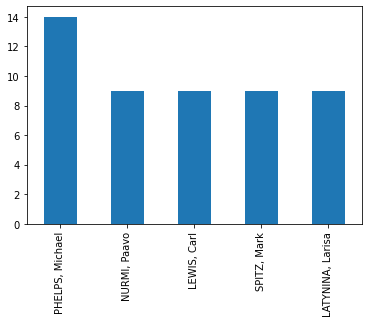

In [42]:
df[df.Medal == 'Gold'].Athlete.value_counts(ascending=False)[0:5].plot.bar()

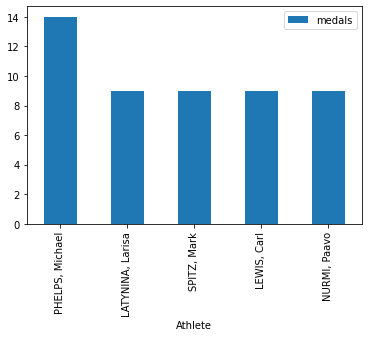

In [43]:
# С помощью groupby. Изменяется порядок имен атлетов, имеющих одинаковое кол-во медалей
grouped = df[df.Medal == 'Gold'].groupby('Athlete').Athlete.agg(['count']).sort_values('count', ascending=False)
grouped.rename(columns={'count':'medals'})[0:5].plot.bar()

### 11. Покажите суммарное количество медалей, выигранных странами в последних олимпийских играх.

In [44]:
df[df.Edition == 2008].groupby('NOC').NOC.agg('count')

NOC
AFG     1
AHO     0
ALG     2
ANZ     0
ARG    51
       ..
VIE     1
YUG     0
ZAM     0
ZIM     4
ZZX     0
Name: NOC, Length: 138, dtype: int64

In [45]:
# Полный список
pd.options.display.max_rows = 150
df[df.Edition == 2008].groupby('NOC').NOC.agg('count')
pd.reset_option('display.max_rows')

NOC
AFG      1
AHO      0
ALG      2
ANZ      0
ARG     51
ARM      6
AUS    149
AUT      3
AZE      7
BAH      5
BAR      0
BDI      0
BEL      5
BER      0
BLR     30
BOH      0
BRA     75
BUL      5
BWI      0
CAN     34
CHI      1
CHN    184
CIV      0
CMR      1
COL      2
CRC      0
CRO      5
CUB     47
CZE      7
DEN     18
DJI      0
DOM      2
ECU      1
EGY      1
ERI      0
ESP     71
EST      3
ETH      7
EUA      0
EUN      0
FIN      5
FRA     76
FRG      0
GBR     77
GDR      0
GEO      6
GER    101
GHA      0
GRE      7
GUY      0
HAI      0
HKG      0
HUN     27
INA      7
IND      3
IOP      0
IRI      2
IRL      3
IRQ      0
ISL     14
ISR      1
ISV      0
ITA     42
JAM     17
JPN     51
KAZ     13
KEN     14
KGZ      2
KOR     78
KSA      0
KUW      0
LAT      3
LIB      0
LTU      5
LUX      0
MAR      2
MAS      1
MDA      1
MEX      4
MGL      4
MKD      0
MOZ      0
MRI      1
NAM      0
NED     62
NGR     24
NIG      0
NOR     22
NZL     14
PAK      0
PAN   

__12. Постройте таблицу, в которой по годам всех олимпиад покажите топовых атлетов США (1 атлет на год) по общему количеству медалей. Включите дисциплину атлета.__

In [61]:
# pd.set_option('display.max_rows', 4500)
USA_athletes = df[df.NOC == 'USA']
total_medals = USA_athletes.groupby(['Edition', 'Athlete']).Medal.agg(['count']).rename(columns={'count':'total_medals'})
# total_medals
disciplins = USA_athletes[['Edition', 'Athlete', 'Discipline']].set_index(['Edition', 'Athlete'])
# disciplins
temp = pd.merge(total_medals, disciplins, left_index=True, right_index=True)
temp
# pd.reset_option('display.max_rows')

total_medals  Discipline
Edition Athlete                                  
1896    BLAKE, Arthur               1   Athletics
        BURKE, Thomas               2   Athletics
        BURKE, Thomas               2   Athletics
        CLARK, Ellery               2   Athletics
        CLARK, Ellery               2   Athletics
...                               ...         ...
2008    WINDES, Elsie               1  Water polo
        WINEBERG, Mary              1   Athletics
        WRIGHT, Adam                1  Water polo
        ZAGUNIS, Mariel             2     Fencing
        ZAGUNIS, Mariel             2     Fencing

[4335 rows x 2 columns]

In [102]:
# pd.set_option('display.max_rows', 4500)
USA_top = temp.copy()
USA_top.reset_index(['Edition', 'Athlete'], inplace=True)
USA_top.set_index(['Edition', 'total_medals'], inplace=True)
USA_top.sort_index(ascending=False, inplace=True)
USA_top
# USA_top.index
# pd.reset_option('display.max_rows')

Athlete Discipline
Edition total_medals                                 
2008    8                  PHELPS, Michael   Swimming
        8                  PHELPS, Michael   Swimming
        8                  PHELPS, Michael   Swimming
        8                  PHELPS, Michael   Swimming
        8                  PHELPS, Michael   Swimming
...                                    ...        ...
1896    1             HOYT, William Welles  Athletics
        1                 JAMISON, Herbert  Athletics
        1                    LANE, Francis  Athletics
        1                      PAINE, John   Shooting
        1                    TYLER, Albert  Athletics

[4335 rows x 2 columns]

_Как вытащить отсюда по верхней строчке второго индекса, я так и не придумала... (((  
Да вообще структура мультииндекса как-то по-другому выглядит, не так, как в видео у Кевина, 
хотя делала прямо по его видео._

In [112]:
# Могу только посмотреть конкретный год
USA_top.loc[2004, :].iloc[0:1]
USA_top.loc[1984, :].iloc[0:1]

,Athlete,Discipline
total_medals,,
8,"PHELPS, Michael",Swimming


,Athlete,Discipline
total_medals,,
5,"RETTON, Mary-Lou",Artistic G.


In [114]:
# Индексация как у Кевина тоже не работает, так как iloc не хочет так работать: 
# stocks.loc[(slice(None), ['2016-10-03', '2016-10-04']), :]
USA_top.loc[(slice(None), 2), :]
USA_top.iloc[(slice(None), 0), :]

Athlete   Discipline
Edition total_medals                               
2008    2                  DIX, Walter    Athletics
        2                  DIX, Walter    Athletics
        2               FELIX, Allyson    Athletics
        2               FELIX, Allyson    Athletics
        2             HORTON, Jonathan  Artistic G.
...                                ...          ...
1896    2                BURKE, Thomas    Athletics
        2                CLARK, Ellery    Athletics
        2                CLARK, Ellery    Athletics
        2                PAINE, Sumner     Shooting
        2                PAINE, Sumner     Shooting

[744 rows x 2 columns]

IndexingError: Too many indexers